<a href="https://colab.research.google.com/github/Electromayonaise/Calculus-Notebooks/blob/main/GrafosDirigidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=http://www.acofi.edu.co/eiei2016/wp-content/uploads/2016/09/Logo-Universidad-ICESI.jpg width="300" height="200" align="center">

#**<big><big>Matemáticas Aplicadas ll</big></big><br><small>Depto. Matemáticas & Estadística / Facultad de Ingeniería</small><br><small> Grafos Dirigidos y Cadenas de Markov**
<b>Autores:</b>
* <b>MARTÍN GÓMEZ - A00399958</b>
* <b>ALEJANDRO QUIÑONES - A00377013</b>
* <b>JULIO PRADO - A00399637</b>
* <b>PABLO GUZMAN - A00399523</b>


#Grafos

Un grafo es un conjunto de puntos y un conjunto de líneas, cada una de las cuales une un punto con otro. Los puntos se llaman nodos o vértices de un grafo y las líneas se llaman aristas o arcos. Se representan el conjunto de vértices de un grafo dado G, por Vg, y el conjunto de arcos, por Ag. De manera que se define el grafo G= (V,A)

El estudio de los grafos comienza con Euler, en 1736, con el celebre problema de los puentes de su ciudad, Koenigsberg, siete puentes que unían cuatro sectores de tierra, en el curso del rio Pregal que atravesaba la ciudad. El tema es conocido como el Koenigsberg Bridge Problem, que propone, arrancando de un area de tierra, recorrer las otras areas de tierra, a través de los puentes, pasando solo una vez por cada puente, retornando al area de inicio. La solución a que llegó Euler es que para que exista una caminata, que arrancando en un vértice, recorra todos los puentes una vez y vuelva al punto de partida, los vértices deben tener, cada uno, un grado par. El matemático inició de esta manera la representación de problemas a través de grafos.

#Grafos dirigidos

Un grafo dirigido es aquel en el que los arcos tienen un único sentido, este tipo de grafos también son conocidos como digrafos. Un arco e = (x,y)  se considera dirigido desde x hacia y. Otra notación válida es e = <x,y>. En ambos casos, el vértice x cumple un rol de «emisor» y el vértice y uno de «receptor»

Suponga que tenemos $n$ individuos $P_{1}$,$P_{2}$,...$P_{n}$, algunos de los cuales tienen relación entre sí. Daremos por sentado que ninguno de ellos tienen relación consigo mismo.

Contexto #1

La matríz de adyacencia es una forma de representar un grafo.

Si $M[i][j]=1$, entonces exíste una arísta que permite llegar del vertice i al vertice j.

Si $M[i][j]=0$, entonces no exíste una arísta que permite llegar del vertice i al vertice j.



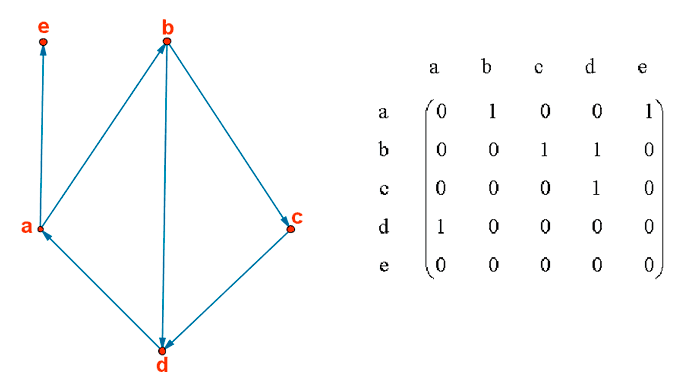



Grafo #1


A)



 V={$p_1,p_2,p_3$}

E={$(p_1,p_2),(p_2,p_3)$}

$G_1(V,E)$


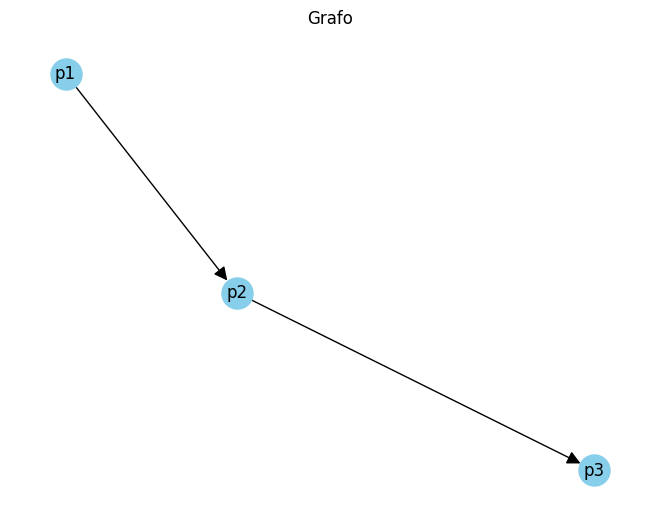

MATRIZ DE ADYACENCIA
[[0 1 0]
 [0 0 1]
 [0 0 0]]


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos
G.add_node("p1")
G.add_node("p2")
G.add_node("p3")

# Agregar aristas con dirección
G.add_edge("p1", "p2")
G.add_edge("p2", "p3")

#Generar matriz de adyacencia
matriz = nx.adjacency_matrix(G).todense()

# Dibujar el grafo con flechas
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_color='black', arrows=True, arrowsize=20)
plt.title("Grafo")
plt.show()


print("MATRIZ DE ADYACENCIA")
print(matriz)


##Dominancia de un grafo

El estudio de dominancia en grafos se basa en la noción de que un vértice domina a todos aquellos vértices adyacentes con el. El número de dominancia de un grafo se define entonces como el mínimo número de vértices necesario para dominar todos los vértices del grafo.

ej:

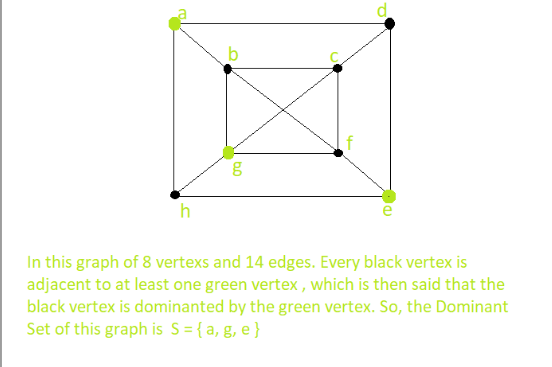

In [ ]:
from typing import List

g = []
box = []

def Dominant(ver: int, edge: int) -> List[int]:
    S = [] # set S
    for i in range(ver):
        if not box[i]:
            S.append(i)
            box[i] = True
            for j in range(len(g[i])):
                if not box[g[i][j]]:
                    box[g[i][j]] = True
                    break
    return S

# Driver function
if __name__ == '__main__':
    ver = 5 # Enter number of vertices
    edge = 6 # Enter number of Edges
    for i in range(ver):
        g.append([])

    # Setting all index value of an array as False
    box = [False for i in range(ver)]

    # Enter all the end-points of all the Edges
    # g[x].append(y)       g[y].append(x)
    g[0].append(1)
    g[1].append(0) # x = 1, y = 2 ;
    g[1].append(2)
    g[2].append(1) # x = 2, y = 3 ;
    g[2].append(3)
    g[3].append(2) # x = 3, y = 4 ;
    g[0].append(3)
    g[3].append(0) # x = 1, y = 4 ;
    g[3].append(4)
    g[4].append(3) # x = 4, y = 5 ;
    g[2].append(4)
    g[4].append(2) # x = 3, y = 5 ;

    S = Dominant(ver, edge)
    print("The Dominant Set is : {{ {} }}".format(" ".join(str(x+1) for x in S)))


The Dominant Set is : { 1 3 5 }


La cardinalidad del menor conjunto posible G es el número dominante del grafo

## Definición de subgrafos de un grafo

Un subgrafo de un grafo G es un grafo cuyos conjuntos de vértices y aristas son subconjuntos de los de G. Se dice
que un grafo G contiene a otro grafo H si algún subgrafo de G es H o es isomorfo a H (un isomorfismo de grafos es una biyección de los vértices de un grafo sobre otro, de modo que se preserva la adyacencia de los vértices).
El subgrafo inducido de G es un subgrafo G' de G tal que contiene todas las aristas adyacentes al subconjunto de
vértices de G.
Definición:
Sea G=(V, A). G’=(V’,A’) se dice subgrafo de G si:

1. $V’ \subseteq V$
2. $ A' \subseteq A$
3. (V’,A’) es un grafo

Si G’=(V’,A’) es subgrafo de G, para todo v G se cumple gr (G’,v)≤ gr (G, v)

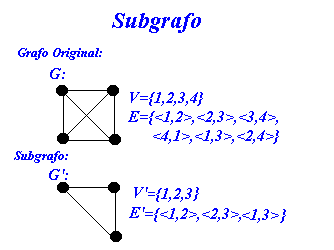

Un clan es un subconjunto de vertices que cumple con ciertas propiedades y un subgrafo está compuesto tanto de vertices como aristas. Por tanto, no son lo mismo. La principal diferencia entre un clan y un subgrafo es que un clan es un subgrafo completo, donde todos los vértices están conectados entre sí, mientras que un subgrafo puede ser cualquier conjunto de vértices y aristas que formen una estructura más pequeña dentro de un grafo más grande sin necesariamente tener todas las aristas posibles entre los vértices en ese conjunto.
Las propiedades que deben cumplir en un subconjunto de vertices para que este se considere clan son:

1) El número de vertices debe ser mayor o igual a 3

2) Todos los vertices deben estar conectados entre sí en ambas direcciones.

3) Se deben considerar la mayor cantidad posibles de vertices que cumplan con la propiedad 2.

Trayectoria

Una trayectoria entre el vertice $"i"$ y el vertice $"j" $ es un conjunto de vertices y una secuencia aristas que permiten llegar del nodo "i" al nodo "j"


Etapa

La etapa de una trayectoria del vertices A al vertice B, es el numero de aristas o pasos que componen a la trayectoria.

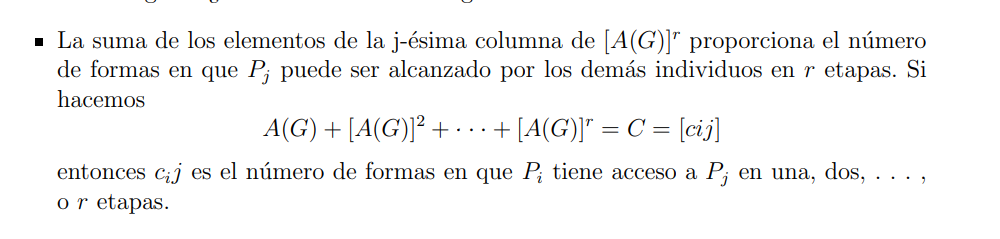

Nuestra forma de interpretar este enunciado es que teniendo una matriz de adyacencia A(G), es posible conocer el numero de formas de llegar de la arista i a la arista j en exactamente r pasos, multiplicando la matriz por sí misma r veces y consultando el valor de $A^r[i][j]$

Luego se le suman las matrices de exponentes menores para dar cuenta de que existen formas de llegar de la arista i a la arista j  en menos de r pasos

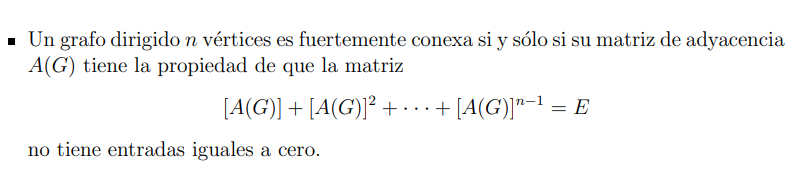

En cuanto a as digráficas fuertemente conexas, partimos por definirlas como aquellos grafos dirigidos que cumplen que, para cualquier par de vértices distintos existe un conjunto de aristas que me permite llegar en cualquier sentido; es decir, todos los nodos son accesibles en una cantidad de pasos igual o menor a el número de vertices-1. En términos de las matrices resultantes, esto quiere decir que la matriz que obtenemos al realizar la suma de la matriz de adyacencia elevada desde 1 hasta n-1, es una matriz E tal que no puede contener ningún 0, es decir, no puede haber algún nodo inaccesible.

#Ejercicios Grafos dirigídos

1)Considere una linea de produccion con cinco estaciones, P1, P2, P3, P4yP5, en
una empresa de alimentos. Dentro de la linea se han observado las siguientes
interacciones entre las estaciones:
1. P1 depende de P2, P3 y P4.
2. P2 depende de P1 y P5.
3. P3 depende de P1, P2 y P4.
4. P4 depende de P2, P3 y P5.
5. P5 depende de P4.
• Trace un grafo dirigido G que describa esta situaci´on. Escriba la matriz de
adyacencia que representa a G. ¿por que A(G) no es necesariamente una matriz
simétrica?


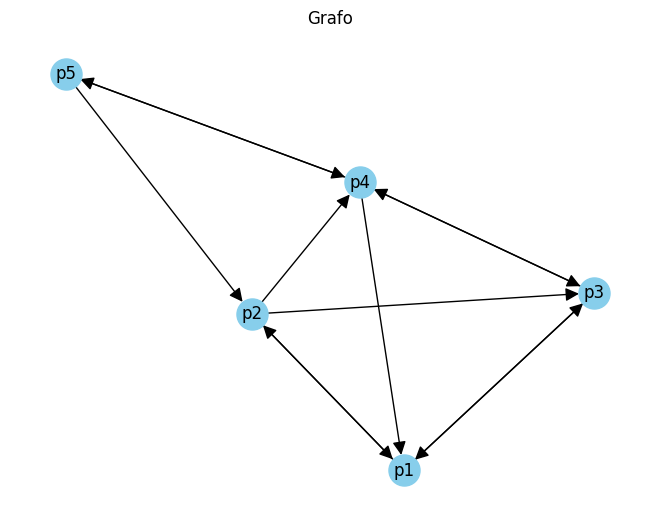

MATRIZ DE ADYACENCIA
[[0 1 1 0 0]
 [1 0 1 1 0]
 [1 0 0 1 0]
 [1 0 1 0 1]
 [0 1 0 1 0]]


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos
G.add_node("p1")
G.add_node("p2")
G.add_node("p3")
G.add_node("p4")
G.add_node("p5")

# Dependencias de p1
G.add_edge("p2", "p1")
G.add_edge("p3", "p1")
G.add_edge("p4", "p1")

#Dependencias de p2

G.add_edge("p1","p2")
G.add_edge("p5","p2")

#Dependencias de p3
G.add_edge("p1","p3")
G.add_edge("p2","p3")
G.add_edge("p4","p3")

#Dependencias de p4
G.add_edge("p2","p4")
G.add_edge("p3","p4")
G.add_edge("p5","p4")

#Dependencias de p5
G.add_edge("p4","p5")


#Depende

#Generar matriz de adyacencia
matriz = nx.adjacency_matrix(G).todense()

# Dibujar el grafo con flechas
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_color='black', arrows=True, arrowsize=20)
plt.title("Grafo")
plt.show()


print("MATRIZ DE ADYACENCIA")
print(matriz)


La matriz de adyacencia no es necesariamente simétrica debido a que el hecho de que exísta un arista que conecte el nodo x al y, no implica que exista otra que conecte el nodo y al x.

2) Considere la siguiente relación de influencia entre cinco individuos.

P1 influye en P2, P4 y P5

P2 influye en P3 y P4

P3 influye en P1 y P4

P4 influye en P5

P5 influye en P2 y P3

responda:

2.1. ¿Puede P4 influir en P1 en dos etapas como máximo?

2.2. ¿De cuántas formas influye P1 en P4 en exactamente tres etapas?

2.3. ¿De cuántas formas influye P1 enP4 en una, dos o tres etapas?


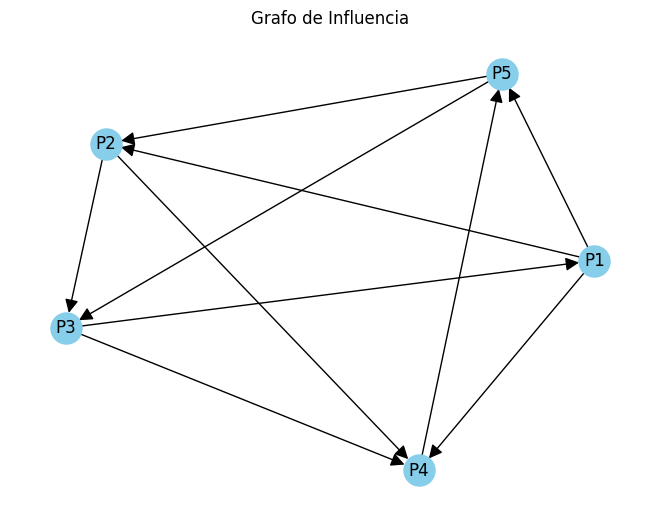

MATRIZ DE ADYACENCIA
[[0 1 0 1 1]
 [0 0 1 1 0]
 [1 0 0 1 0]
 [0 0 0 0 1]
 [0 1 1 0 0]]


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos
G.add_node("P1")
G.add_node("P2")
G.add_node("P3")
G.add_node("P4")
G.add_node("P5")

# Establecer las relaciones de influencia
G.add_edge("P1", "P2")
G.add_edge("P1", "P4")
G.add_edge("P1", "P5")

G.add_edge("P2", "P3")
G.add_edge("P2", "P4")

G.add_edge("P3", "P1")
G.add_edge("P3", "P4")

G.add_edge("P4", "P5")

G.add_edge("P5", "P2")
G.add_edge("P5", "P3")

# Generar matriz de adyacencia
matriz = nx.adjacency_matrix(G).todense()

# Dibujar el grafo con flechas
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_color='black', arrows=True, arrowsize=20)
plt.title("Grafo de Influencia")
plt.show()

print("MATRIZ DE ADYACENCIA")
print(matriz)


2.1. Gráficamente, podemos ver que P4 no puede influir en P1 en dos etapas o menos, pues P4 solo influye en P5 y P5 no se conecta con P1, esto lo podemos confirmar crando un código que verifique la matriz de adyacencia en r etapas (2 en este caso)  

In [ ]:
import numpy as np

# Función para calcular A^r
def matrix_power(A, r):
    result = np.identity(A.shape[0])
    for _ in range(r):
        result = np.dot(result, A)
    return result

# Matriz de adyacencia
A = np.array([[0, 1, 0, 1, 1],
              [0, 0, 1, 1, 0],
              [1, 0, 0, 1, 0],
              [0, 0, 0, 0, 1],
              [0, 1, 1, 0, 0]])

# Número de pasos r
r = 2

# Calcular A^r
A_r = matrix_power(A, r)

# Función para verificar si es posible llegar de a a b en r pasos o menos
def can_reach(a, b, r):
    return A_r[a][b] > 0

#  comprobación de si es posible llegar de a a b en r pasos o menos
nodes_to_check = [(4, 1)]

for a, b in nodes_to_check:
    if can_reach(a, b, r):
        print(f"Es posible llegar de {a} a {b} en {r} pasos o menos")
    else:
        print(f"No es posible llegar de {a} a {b} en {r} pasos o menos")


No es posible llegar de 4 a 1 en 2 pasos o menos


2.2. De igual manera, podemos resolver este punto calculando la matriz de adyacencia en 3 etapas, mediante el siguiente código

In [ ]:
import numpy as np

# Matriz de adyacencia
A = np.array([[0, 1, 0, 1, 1],
              [0, 0, 1, 1, 0],
              [1, 0, 0, 1, 0],
              [0, 0, 0, 0, 1],
              [0, 1, 1, 0, 0]])

# Número de pasos r
r = 3

# Nodos de origen y destino
a = 0  # Nodo de origen (P1)
b = 3  # Nodo de destino (P4)

# Calcular A^r
A_r = np.linalg.matrix_power(A, r)

# Verificar si existe una conexión de a a b en exactamente r etapas
if A_r[a][b] > 0:
    num_ways = int(A_r[a][b])
    print(f"Existen {num_ways} formas de llegar de P{a+1} a P{b+1} en exactamente {r} etapas.")
else:
    print(f"No existe forma de llegar de P{a+1} a P{b+1} en exactamente {r} etapas.")


Existen 3 formas de llegar de P1 a P4 en exactamente 3 etapas.


2.3. Para calcular de cuantas formas influye P1 en P4 en una, dos, o tres etapas, podemos modificar el codigo anterior para que sume las matrices de las etapas anteriores

In [ ]:
import numpy as np

# Matriz de adyacencia
A = np.array([[0, 1, 0, 1, 1],
              [0, 0, 1, 1, 0],
              [1, 0, 0, 1, 0],
              [0, 0, 0, 0, 1],
              [0, 1, 1, 0, 0]])

# Número de pasos r
r = 3

# Nodos de origen y destino
a = 0  # Nodo de origen (P1)
b = 3  # Nodo de destino (P4)

# Calcular la suma de matrices de adyacencia hasta r etapas
num_nodes = A.shape[0]
paths_sum = np.zeros((num_nodes, num_nodes))

for i in range(1, r + 1):
    paths_sum += np.linalg.matrix_power(A, i)

# Imprimir la matriz resultante
print("Matriz resultante de sumar las matrices elevadas:")
print(paths_sum)

# Verificar el número de caminos de a a b en r etapas
num_ways = int(paths_sum[a][b])
print(f"Existen {num_ways} formas de llegar de P{a+1} a P{b+1} en hasta {r} etapas.")




Matriz resultante de sumar las matrices elevadas:
[[2. 3. 4. 5. 3.]
 [1. 2. 2. 3. 3.]
 [1. 3. 3. 3. 3.]
 [1. 1. 2. 2. 1.]
 [2. 2. 2. 4. 3.]]
Existen 5 formas de llegar de P1 a P4 en hasta 3 etapas.


3) Considere una red de comunicacion entre cinco individuos, descrita con la matriz de adyacencia dada, realizamos una representación de dicha matriz de adyacencia:




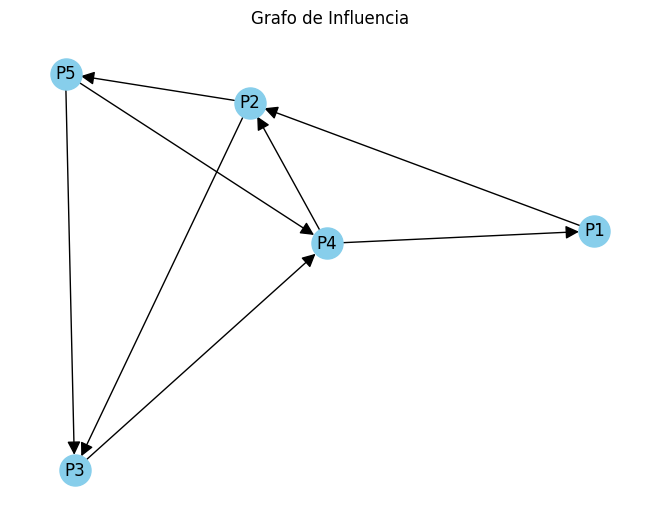

MATRIZ DE ADYACENCIA
[[0 1 0 0 0]
 [0 0 1 0 1]
 [0 0 0 1 0]
 [1 1 0 0 0]
 [0 0 1 1 0]]


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Matriz de adyacencia
A = np.array([[0, 1, 0, 0, 0],
              [0, 0, 1, 0, 1],
              [0, 0, 0, 1, 0],
              [1, 1, 0, 0, 0],
              [0, 0, 1, 1, 0]])

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos
for i in range(len(A)):
    G.add_node(f"P{i + 1}")

# Establecer relaciones de acuerdo a la matriz de adyacencia
for i in range(len(A)):
    for j in range(len(A)):
        if A[i][j] == 1:
            G.add_edge(f"P{i + 1}", f"P{j + 1}")

# Dibujar el grafo con flechas
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_color='black', arrows=True, arrowsize=20)
plt.title("Grafo de Influencia")
plt.show()

print("MATRIZ DE ADYACENCIA")
print(A)


3.1 ¿P3 puede enviar un mensaje a P5 en dos etapas como máximo?

No es posible enviar un mensaje de p3 a p5 en dos etapas puesto a que no encontramos un camino en donde p3 se conecte hacia este, esto se puede ver en el codigo que usamos en el punto anterior.

In [ ]:
import numpy as np

# Matriz de adyacencia
A = np.array([[0, 1, 0, 0, 0],
              [0, 0, 1, 0, 1],
              [0, 0, 0, 1, 0],
              [1, 1, 0, 0, 0],
              [0, 0, 1, 1, 0]])

# Número de pasos r
r = 4

# Nodos de origen y destino
a = 2  # Nodo de origen (P3)
b = 4  # Nodo de destino (P5)

# Calcular la suma de matrices de adyacencia hasta r etapas
num_nodes = A.shape[0]
paths_sum = np.zeros((num_nodes, num_nodes))

for i in range(1, r + 1):
    paths_sum += np.linalg.matrix_power(A, i)

# Imprimir la matriz resultante
print("Matriz resultante de sumar las matrices elevadas:")
print(paths_sum)

# Verificar el número de caminos de a a b en r etapas
num_ways = int(paths_sum[a][b])
print(f"Existen {num_ways} formas de llegar de P{a+1} a P{b+1} en hasta {r} etapas.")


Matriz resultante de sumar las matrices elevadas:
[[2. 3. 2. 3. 1.]
 [3. 5. 4. 3. 3.]
 [1. 2. 3. 3. 2.]
 [3. 4. 4. 5. 2.]
 [2. 4. 5. 4. 3.]]
Existen 2 formas de llegar de P3 a P5 en hasta 4 etapas.



3.2 ¿Cuál es el número mínimo de etapas que garantizará que cada persona puede enviar un mensaje a cualquier otra (que no sea ella misma)?

Para garantizar que cada persona pueda enviar un mensaje a cualquier otra (excluyéndose a sí misma), necesitamos encontrar el diámetro de la red, que es la distancia más larga entre cualquier par de nodos.

Diámetro: 3
Esto significa que el número mínimo de etapas para garantizar la comunicación entre cualquier par de personas es 3. Lo comprobamos en el siguiente código:

In [ ]:
import numpy as np

# Matriz de adyacencia
A = np.array([[0, 1, 0, 0, 0],
              [0, 0, 1, 0, 1],
              [0, 0, 0, 1, 0],
              [1, 1, 0, 0, 0],
              [0, 0, 1, 1, 0]])

# Inicializar la potencia mínima a 1
potencia_minima = 1

# Función para verificar si toda la matriz, excepto la diagonal, es diferente de cero
def toda_matriz_excepto_diagonal_diferente_de_cero(matriz):
    np.fill_diagonal(matriz, 1) #Lleno la diagonal de la matriz con 1s, pues estos representan la conexión de un nodo con sigo mismo,
    #cosa que se excluye en el enunciado, asi evito que se itere el ciclo hasta que inclusive esta diagonal sea diferente de 0.
    return np.all(matriz != 0)

# Calcular potencias sucesivas hasta que se cumpla la condición
while not toda_matriz_excepto_diagonal_diferente_de_cero(np.linalg.matrix_power(A, potencia_minima)):
    A += np.linalg.matrix_power(A, potencia_minima)
    potencia_minima += 1

print(f"El número mínimo de etapas para que toda la matriz, excepto la diagonal, sea diferente de 0 es: {potencia_minima}")




El número mínimo de etapas para que toda la matriz, excepto la diagonal, sea diferente de 0 es: 3


3.3 ¿Cuál es el número mínimo de etapas que garantizaría que cada persona puede enviar un mensaje a cualquier otra (inclusive ella misma)?

Para garantizar que cada persona pueda enviar un mensaje a cualquier otra, incluyéndose a sí misma, necesitamos asegurarnos de que no haya nodos inalcanzables. Esto significa que cada nodo debe ser alcanzable desde cualquier otro nodo.

En este caso, podemos ver que todos los nodos están conectados y no hay nodos inalcanzables. El número de etapas que garantiza que cada persona pueda enviar un mensaje a cualquier otra será la etapa en la que la matriz de adyacencia no contenga ningún 0, que con el siguiente código podemos ver se trata de la etapa 4.

In [ ]:
import numpy as np

# Matriz de adyacencia
A = np.array([[0, 1, 0, 0, 0],
              [0, 0, 1, 0, 1],
              [0, 0, 0, 1, 0],
              [1, 1, 0, 0, 0],
              [0, 0, 1, 1, 0]])

# Inicializar la potencia mínima a 1
potencia_minima = 1

# Función para verificar si toda la matriz, excepto la diagonal, es diferente de cero
def toda_la_matriz_diferente_de_cero(matriz):
    np.fill_diagonal(matriz, 1)
    return np.all(matriz != 0)

# Calcular la suma de matrices elevadas hasta que se cumpla la condición
while not toda_la_matriz_diferente_de_cero(A):
    A += np.linalg.matrix_power(A, potencia_minima)
    potencia_minima += 1

print(f"El número mínimo de etapas que garantizaría que cada persona puede enviar un mensaje a cualquier otra (inclusive ella misma) es: {potencia_minima}")



El número mínimo de etapas que garantizaría que cada persona puede enviar un mensaje a cualquier otra (inclusive ella misma) es: 4
